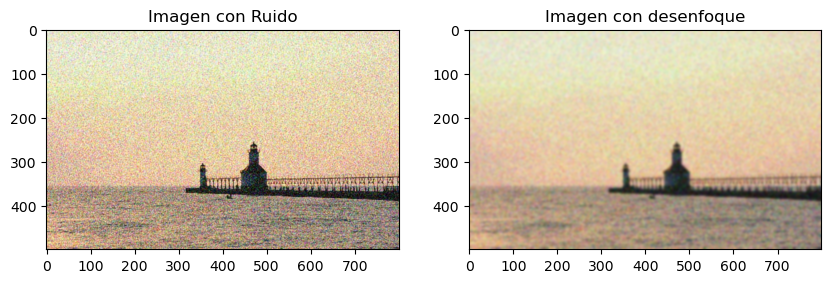

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imagen_aliasing = cv2.imread('..//img/ruido.jpg', cv2.IMREAD_COLOR)

imagen_gris = cv2.cvtColor(imagen_aliasing, cv2.COLOR_RGB2GRAY)
imagen = cv2.cvtColor(imagen_aliasing, cv2.COLOR_BGR2RGB)


imagen_antialiasing = cv2.GaussianBlur(imagen, (15, 15), 0)


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(imagen_aliasing, cv2.COLOR_BGR2RGB))
plt.title('Imagen con Ruido')

plt.subplot(1, 2, 2)
plt.imshow(imagen_antialiasing)
plt.title('Imagen con desenfoque')

plt.show()

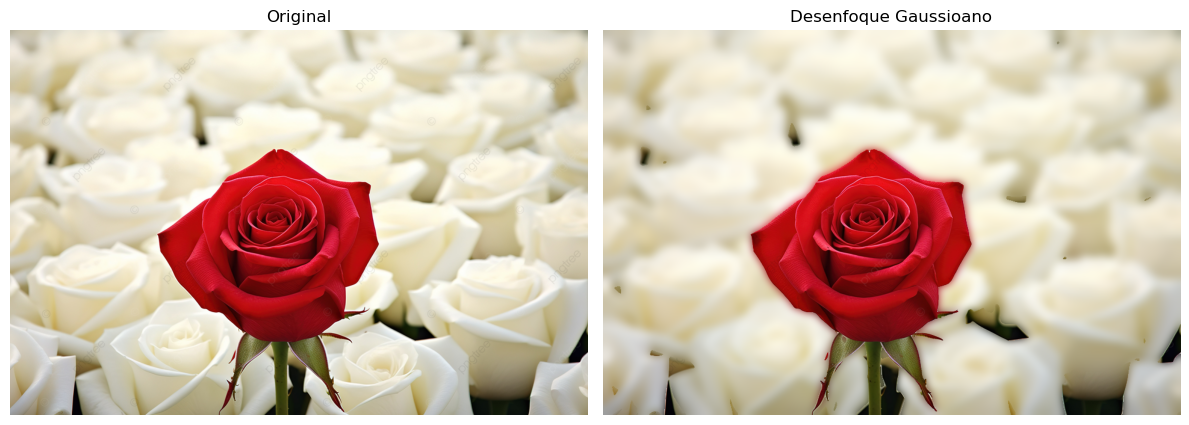

In [40]:
def desenfoqueInv(img):
    img1 = np.copy(img)
    img2 = np.copy(img)
    
    img3 = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    

    desenfoque1 = cv2.GaussianBlur(img3, (7, 7), -1)
    

    _, im_bw = cv2.threshold(desenfoque1, 127, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)


    desenfoque = cv2.GaussianBlur(img2, (45, 45), 0)
    

    desenfoque[im_bw != 0] = img1[im_bw != 0]

    return desenfoque


imagen = cv2.imread('..//img/rosa.png')
imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

img_fin = desenfoqueInv(imagen)



plt.figure(figsize=(12, 9))

plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(imagen)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Desenfoque Gaussioano')
plt.imshow(img_fin)
plt.axis('off')

plt.tight_layout()
plt.show()

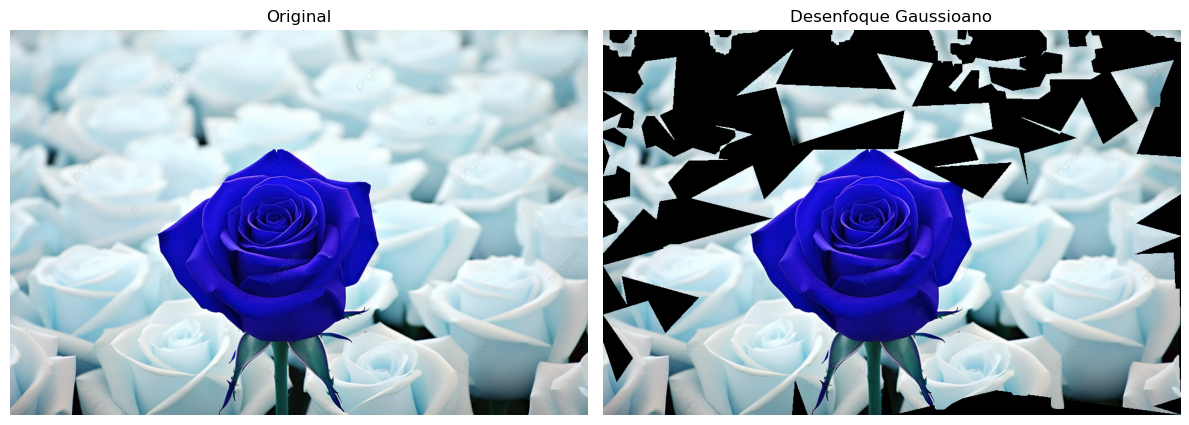

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def process(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_canny = cv2.Canny(img_gray, 10, 20)
    kernel = np.ones((13, 13))
    img_dilate = cv2.dilate(img_canny, kernel, iterations=1)
    return cv2.erode(img_dilate, kernel, iterations=1)
    
def get_mask(img):
    contours, _ = cv2.findContours(process(img), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    blank = np.zeros(img.shape[:2]).astype('uint8')
    for cnt in contours:
        if cv2.contourArea(cnt) > 500:
            peri = cv2.arcLength(cnt, True)
            approx = cv2.approxPolyDP(cnt, peri * 0.004, True)
            cv2.drawContours(blank, [approx], -1, 255, -1) 
    return blank

img = cv2.imread('..//img/rosa.png')
img_masked = cv2.bitwise_and(img, img, mask=get_mask(img))

plt.figure(figsize=(12, 9))

plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(img)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Desenfoque Gaussioano')
plt.imshow(img_masked)
plt.axis('off')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Contados: 204')

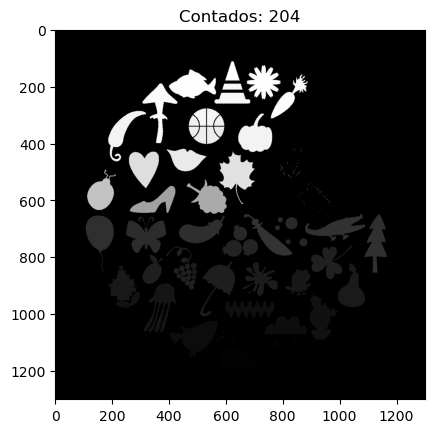

In [42]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt
import skimage.measure as ms

def contar(img):
    img_gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, img_binarizada = cv2.threshold(img_gris, 178, 255, cv2.THRESH_BINARY_INV)

    borde, _ = cv2.findContours(img_binarizada, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cont = len(borde)

    return cont


def etiquetar(image):
    img_gris = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, img_binarizada = cv2.threshold(img_gris, 178, 255, cv2.THRESH_BINARY_INV)

    contorno, _ = cv2.findContours(img_binarizada, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    img_et = np.zeros_like(img_gris, dtype=np.uint8)

    for i, contornin in enumerate(contorno):
        cv2.drawContours(img_et, [contornin], -1, (i + 1), -1)
        
    return img_et


img = cv2.imread('..//img/elementos.jpg')

img_cont = contar(img)

img = etiquetar(img)

plt.imshow(img, cmap='gray')
plt.title('Contados: ' + str(img_cont))

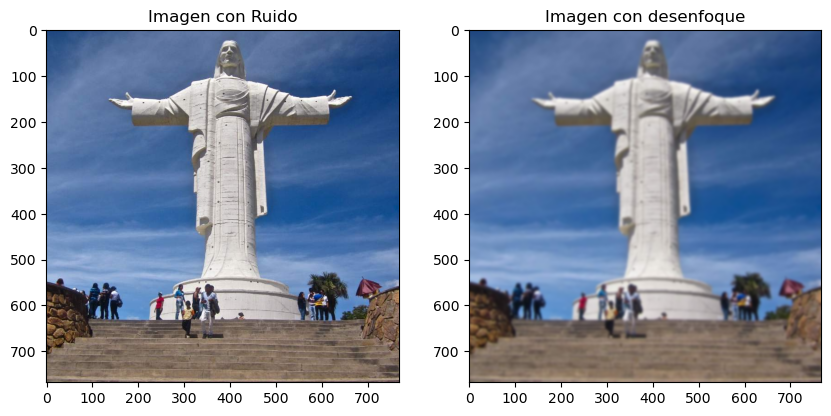

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imagen_aliasing = cv2.imread('..//img/cristo.jpg', cv2.IMREAD_COLOR)

imagen_gris = cv2.cvtColor(imagen_aliasing, cv2.COLOR_RGB2GRAY)
imagen = cv2.cvtColor(imagen_aliasing, cv2.COLOR_BGR2RGB)


imagen_antialiasing = cv2.GaussianBlur(imagen, (15, 15), 0)


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(imagen_aliasing, cv2.COLOR_BGR2RGB))
plt.title('Imagen con Ruido')

plt.subplot(1, 2, 2)
plt.imshow(imagen_antialiasing)
plt.title('Imagen con desenfoque')

plt.show()